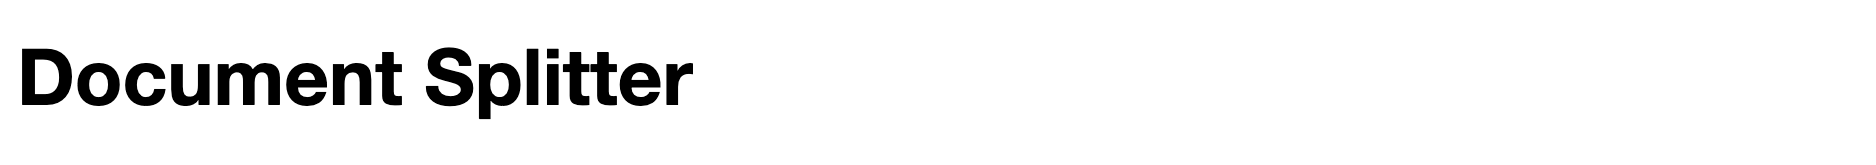

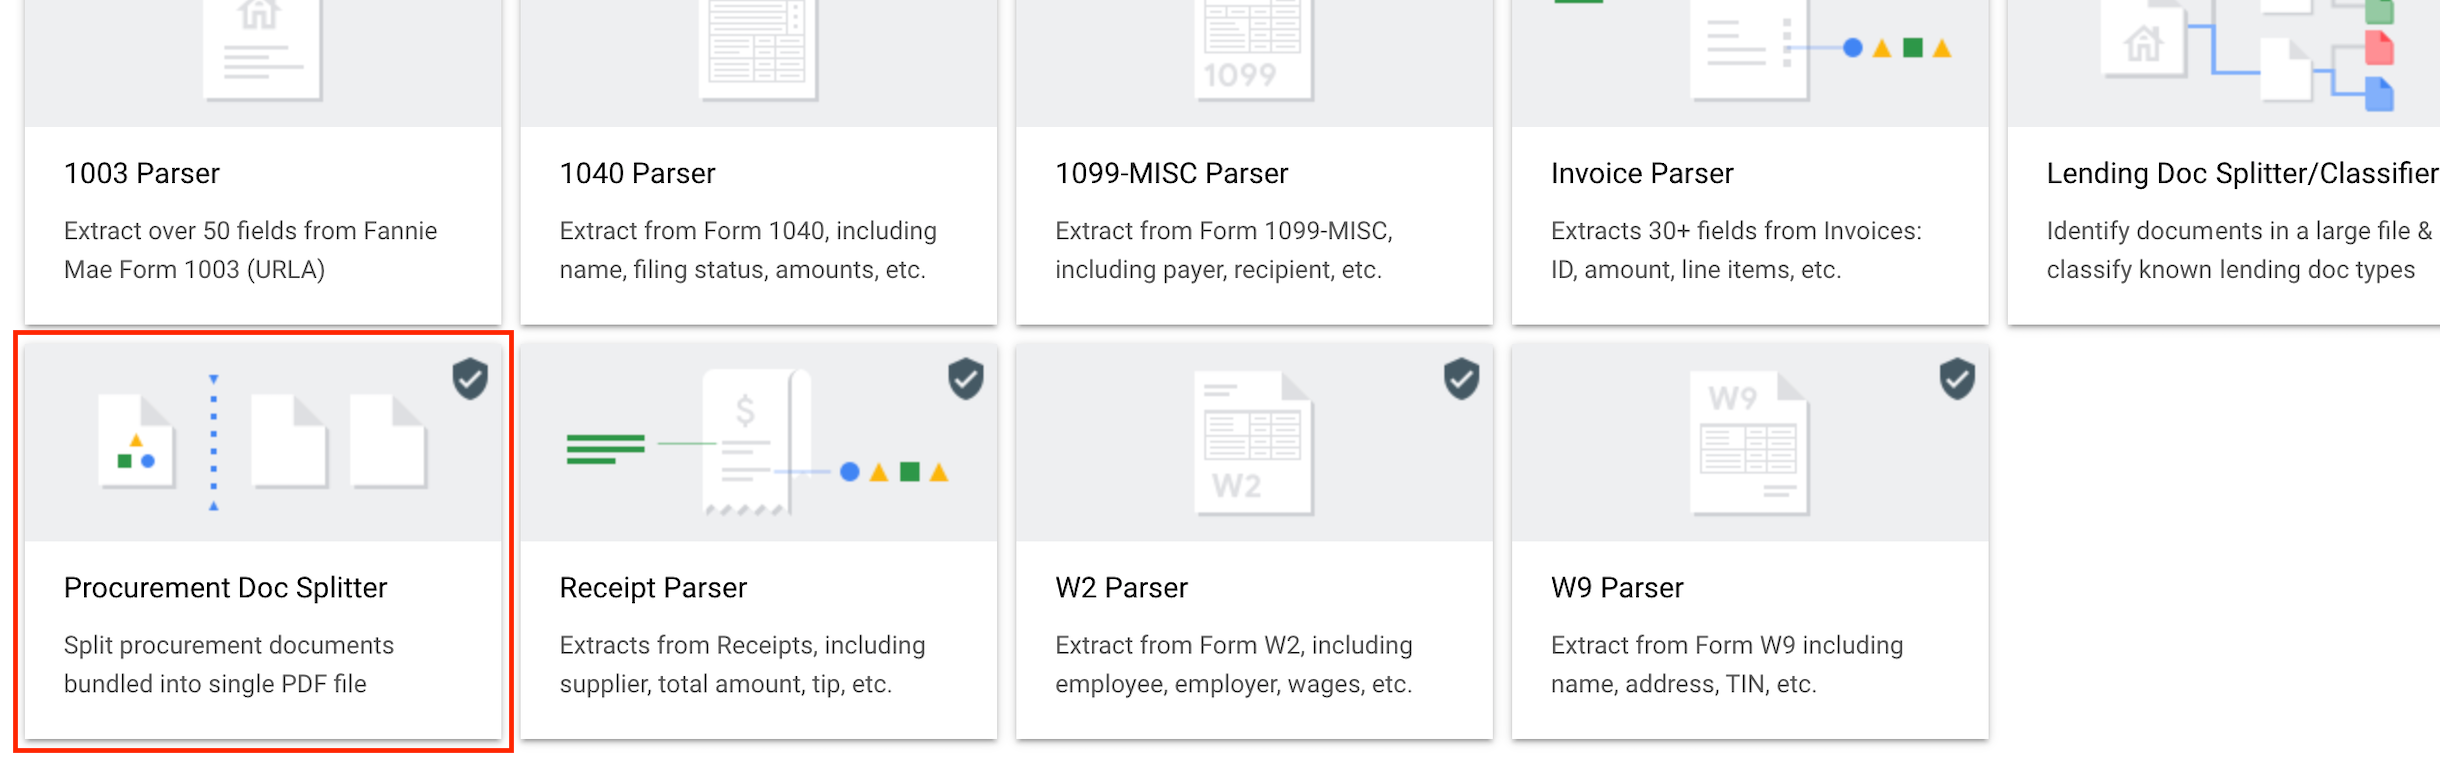

### 1. Download Multi-Page PDF

In [18]:
!gsutil cp gs://cloud-samples-data/documentai/multi-document.pdf .
MULTI_DOC = 'multi-document.pdf'

Copying gs://cloud-samples-data/documentai/multi-document.pdf...
/ [1 files][729.5 KiB/729.5 KiB]                                                
Operation completed over 1 objects/729.5 KiB.                                    



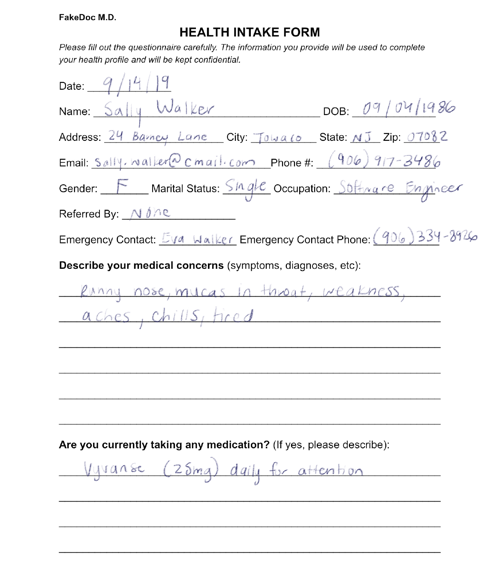
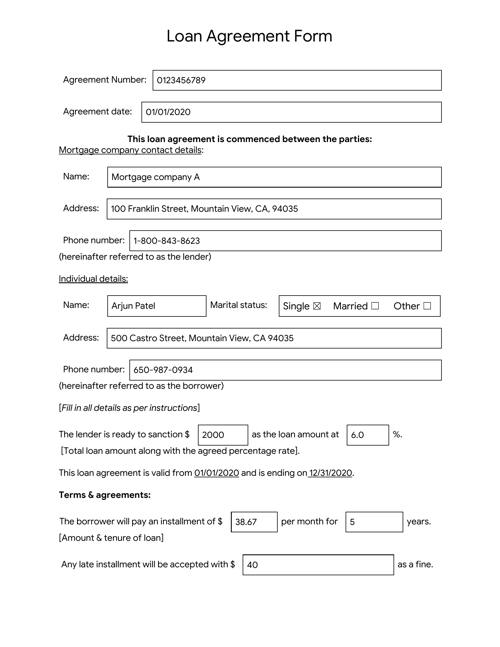
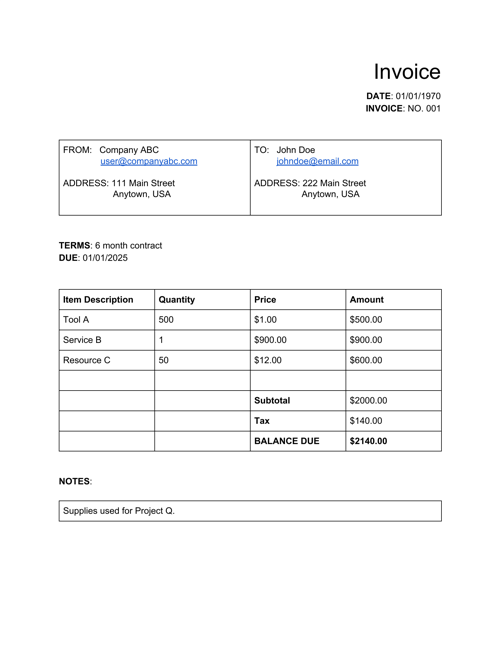


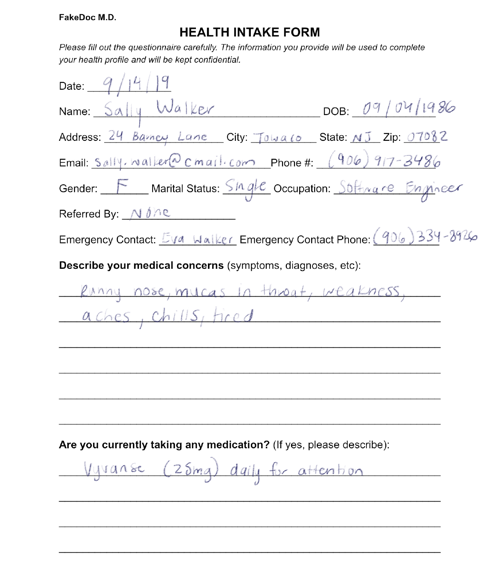
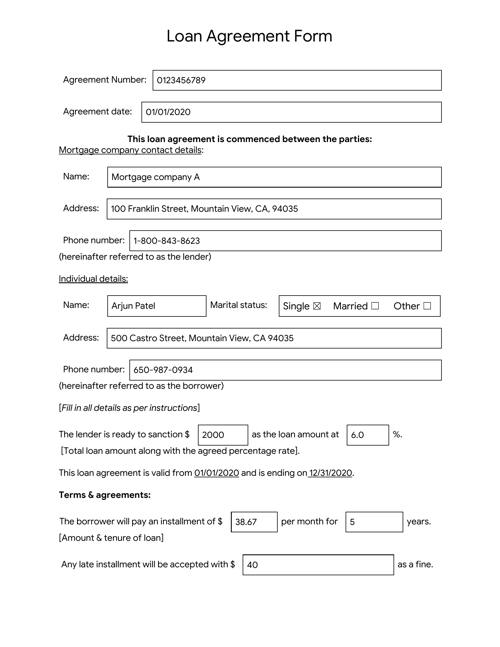
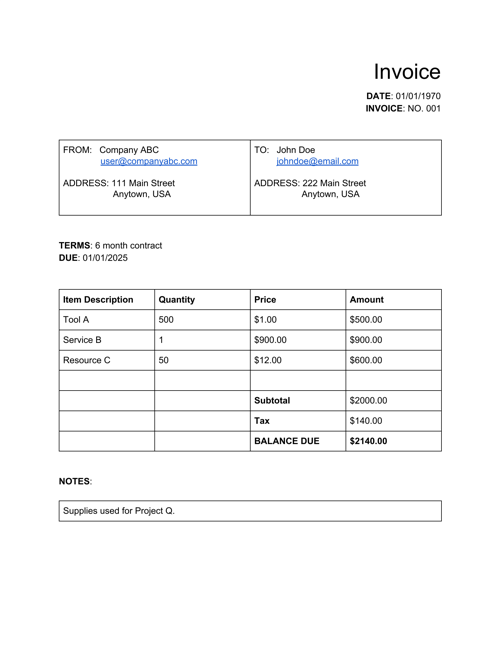

In [30]:
from pdf2image import convert_from_path# , convert_from_bytes
import ipyplot

n_pages = !pdfinfo {MULTI_DOC}  | awk '/^Pages:/ {{print $$2}}'
n_pages = int(n_pages[0])

ipyplot.plot_images(convert_from_path(MULTI_DOC), img_width=500)

### 2. Create Document Splitter
Lorem Ipsom blah blah....

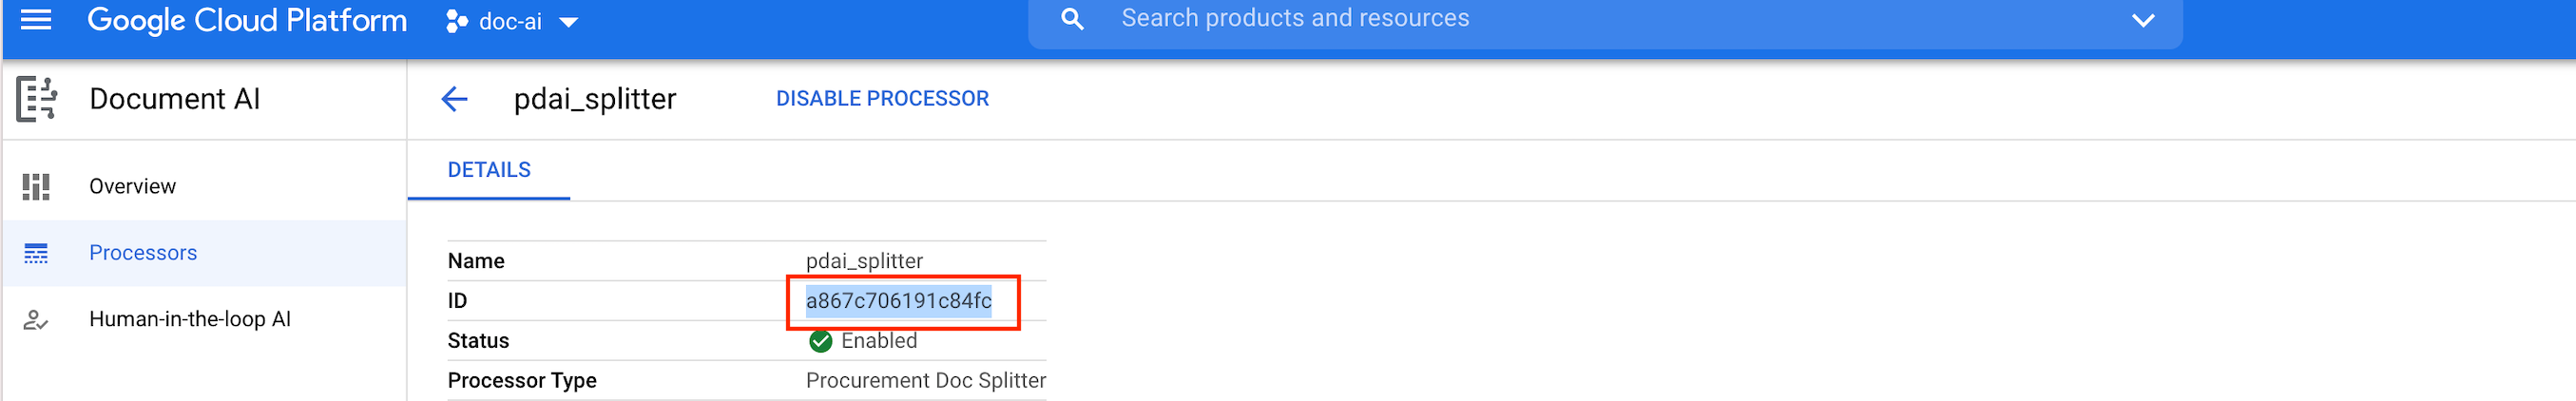

### 3. Test All 3 Splitters

In [10]:
from google.cloud import documentai_v1beta3 as documentai  

PROJECT_ID = 'doc-ai-ce'

SPLITTERS = {
    'GDAI' : '32eac314a5d9baea',
    'LDAI': 'b194c9e614ab6c0c',
    'PDAI': 'a867c706191c84fc'
}

LOCATION = 'us'

### 4. Simple Splitter Function

In [34]:
def test_proc(PROCESSOR_ID, MULTI_DOC):

    # Document AI URI
    name = f"projects/{PROJECT_ID}/locations/{LOCATION}/processors/{PROCESSOR_ID}"
    
    with open(MULTI_DOC, "rb") as image:    
        # Request parameters with PDF file
        document = {"content": image.read(), "mime_type": "application/pdf"}
        request = {"name": name, "document": document}

    # call and return Document AI results
    return documentai.DocumentProcessorServiceClient().process_document(request=request)

### 5. View Varying Results

In [35]:
print('ACTUAL:',n_pages,'\n')

results_dict = {}
for PROCESSOR_ID in SPLITTERS.keys():
    print(PROCESSOR_ID + '-' + SPLITTERS[PROCESSOR_ID], end= ': ')
    results = test_proc(SPLITTERS[PROCESSOR_ID], MULTI_DOC)
    results_dict[PROCESSOR_ID] = results
    print(len(results.document.entities))
    print()

ACTUAL: 9 

GDAI-32eac314a5d9baea: 2

LDAI-b194c9e614ab6c0c: 3

PDAI-a867c706191c84fc: 2



# TRY WITH ANOTHER DOC


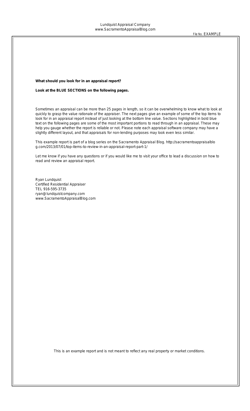
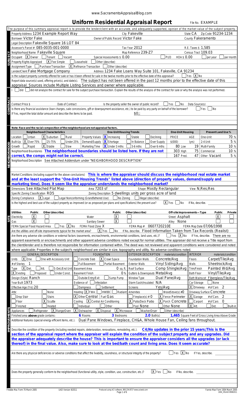
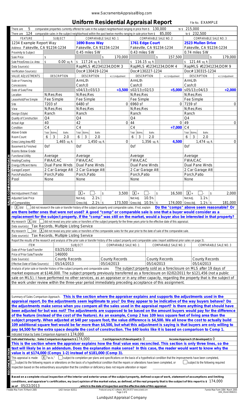
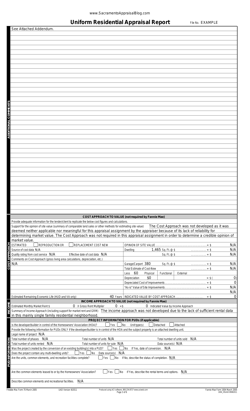
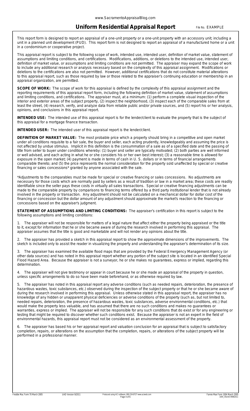
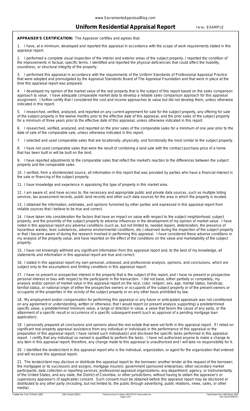
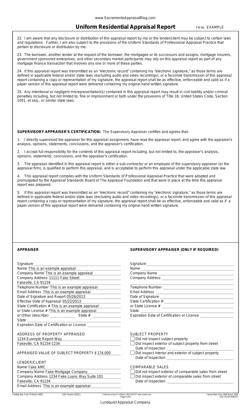
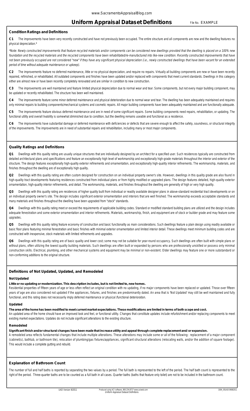
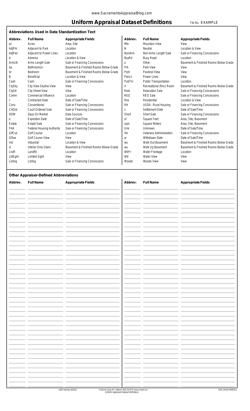


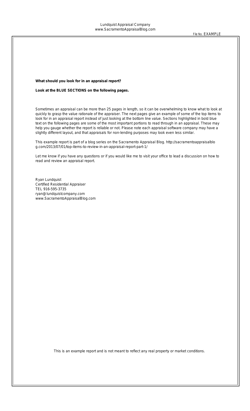
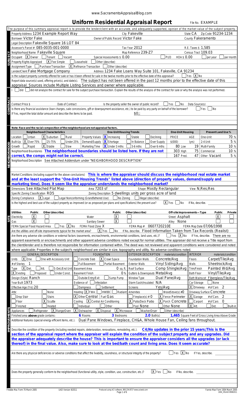
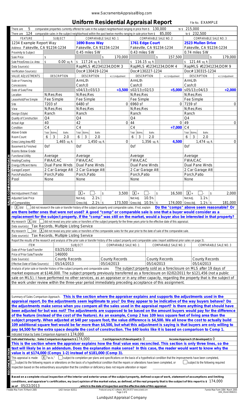
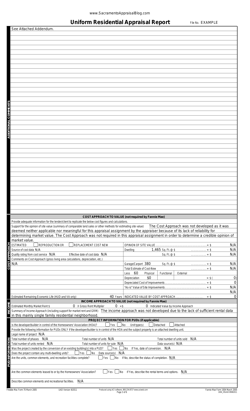
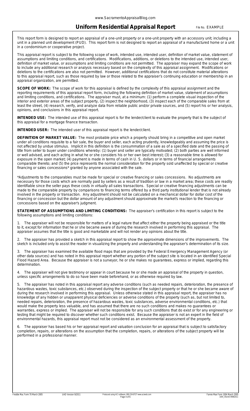
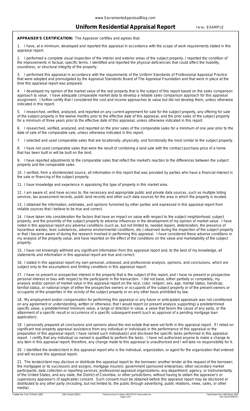
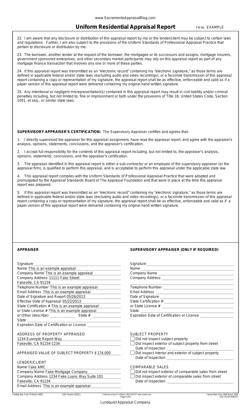
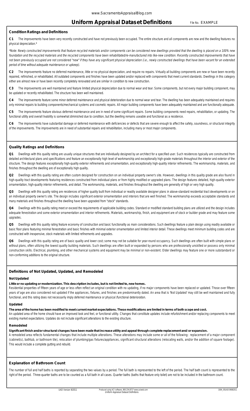
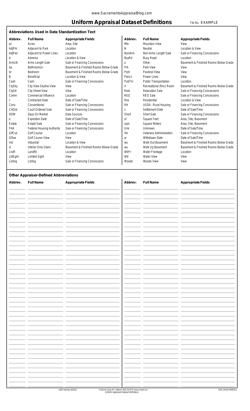


ACTUAL: 9 

GDAI-32eac314a5d9baea: 2

LDAI-b194c9e614ab6c0c: 3

PDAI-a867c706191c84fc: 2



In [40]:
MULTI_DOC = '9-pages.pdf'

n_pages = !pdfinfo {MULTI_DOC}  | awk '/^Pages:/ {{print $$2}}'
n_pages = int(n_pages[0])

ipyplot.plot_images(convert_from_path(MULTI_DOC), img_width=250)

print('\nACTUAL:',n_pages,'\n')

results_dict = {}

for PROCESSOR_ID in SPLITTERS.keys():
    print(PROCESSOR_ID + '-' + SPLITTERS[PROCESSOR_ID], end= ': ')
    results = test_proc(SPLITTERS[PROCESSOR_ID], MULTI_DOC)
    results_dict[PROCESSOR_ID] = results
    print(len(results.document.entities))
    print()

### 5. Get 3rd Page - Invoice

In [8]:
results.document.entities[2]

text_anchor {
  text_segments {
    start_index: 1649
    end_index: 2084
  }
}
type_: "invoice_statement"
confidence: 0.7148493528366089
page_anchor {
  page_refs {
    page: 2
  }
}

In [9]:
[[entity.type_, entity.mention_text, round(entity.confidence, 4)] for entity in results.document.entities]

[['other', '', 0.9501],
 ['other', '', 0.4155],
 ['invoice_statement', '', 0.7148]]

In [55]:
print(results.document.text[results.document.entities[2].text_anchor.text_segments[0].start_index:results.document.entities[2].text_anchor.text_segments[0].end_index])

Invoice
DATE: 01/01/1970
INVOICE: NO. 001
FROM: Company ABC
user@companyabc.com
TO: John Doe
johndoe@email.com
ADDRESS: 111 Main Street
Anytown, USA
ADDRESS: 222 Main Street
Anytown, USA
TERMS: 6 month contract
DUE: 01/01/2025
Item Description
Quantity
Price
Amount
Tool A
500
$1.00
$500.00
Service B
1
$900.00
$900.00
Resource C
50
$12.00
$600.00
Subtotal
$2000.00
Tax
$140.00
BALANCE DUE
$2140.00
NOTES:
Supplies used for Project Q.



### From <i>Doc Splitter Guide</i>
https://codelabs.developers.google.com/codelabs/docai-splitter-parser-v3-python#0

In [98]:
def print_pages_split(text: str, document: dict):
    """
    Document AI identifies possible page splits
    in document. This function converts page splits
    to text snippets and prints it.    
    """
    for i, entity in enumerate(document.entities):
        confidence = entity.confidence
        text_entity = ''
        for segment in entity.text_anchor.text_segments:
            start = segment.start_index
            end = segment.end_index
            text_entity += text[start:end]
        pages = [p.page for p in entity.page_anchor.page_refs]
        print(f"*** Entity number: {i}, Split Confidence: {confidence} ***")
        print(f"*** Pages numbers: {[p for p in pages]} ***\nText snippet: {text_entity[:100]}")
        print()
        
print_pages_split(results.document.text, results.document)

*** Entity number: 0, Split Confidence: 0.5363052487373352 ***
*** Pages numbers: [0] ***
Text snippet: FakeDoc M.D.
HEALTH INTAKE FORM
Please fill out the questionnaire carefully. The information you pro

*** Entity number: 1, Split Confidence: 0.7433328628540039 ***
*** Pages numbers: [1] ***
Text snippet: Loan Agreement Form
Agreement Number: 0123456789
Agreement date:
01/01/2020
This loan agreement is c

*** Entity number: 2, Split Confidence: 0.9952753782272339 ***
*** Pages numbers: [2] ***
Text snippet: Invoice
DATE: 01/01/1970
INVOICE: NO. 001
FROM: Company ABC
user@companyabc.com
TO: John Doe
johndoe

